# **<font size=4 color=#BB3D00 face=微软雅黑>将信号与不同开始时间对齐</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/align-signals-using-cross-correlation.html     
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例：将信号与不同开始时间对齐</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：将信号与不同开始时间对齐</font>

许多测量涉及多个传感器异步采集的数据。如果要集成信号，则必须同步它们。
例如，假设有一辆汽车经过一座桥。它产生的振动由位于不同位置的三个相同传感器进行测量。信号有不同到达时间。

In [6]:
import scipy.io as sio
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import ndarray
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示中文标签

In [7]:
# 信号对齐
def alignsignals(s1: ndarray, s2: ndarray, s3: ndarray, delay_times: tuple):
    # 按照延迟量对信号进行切片
    # 对s1进行延迟
    s1_align = s1[delay_times[0]::, :]
    # 对s2进行延迟
    s2_align = s2[delay_times[1]:, :]
    # 对s3进行延迟
    s3_align = s3[delay_times[2]:, :]
    return s1_align, s2_align, s3_align

将信号加载到工作区并进行绘图。

D:\Program Files (x86)\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


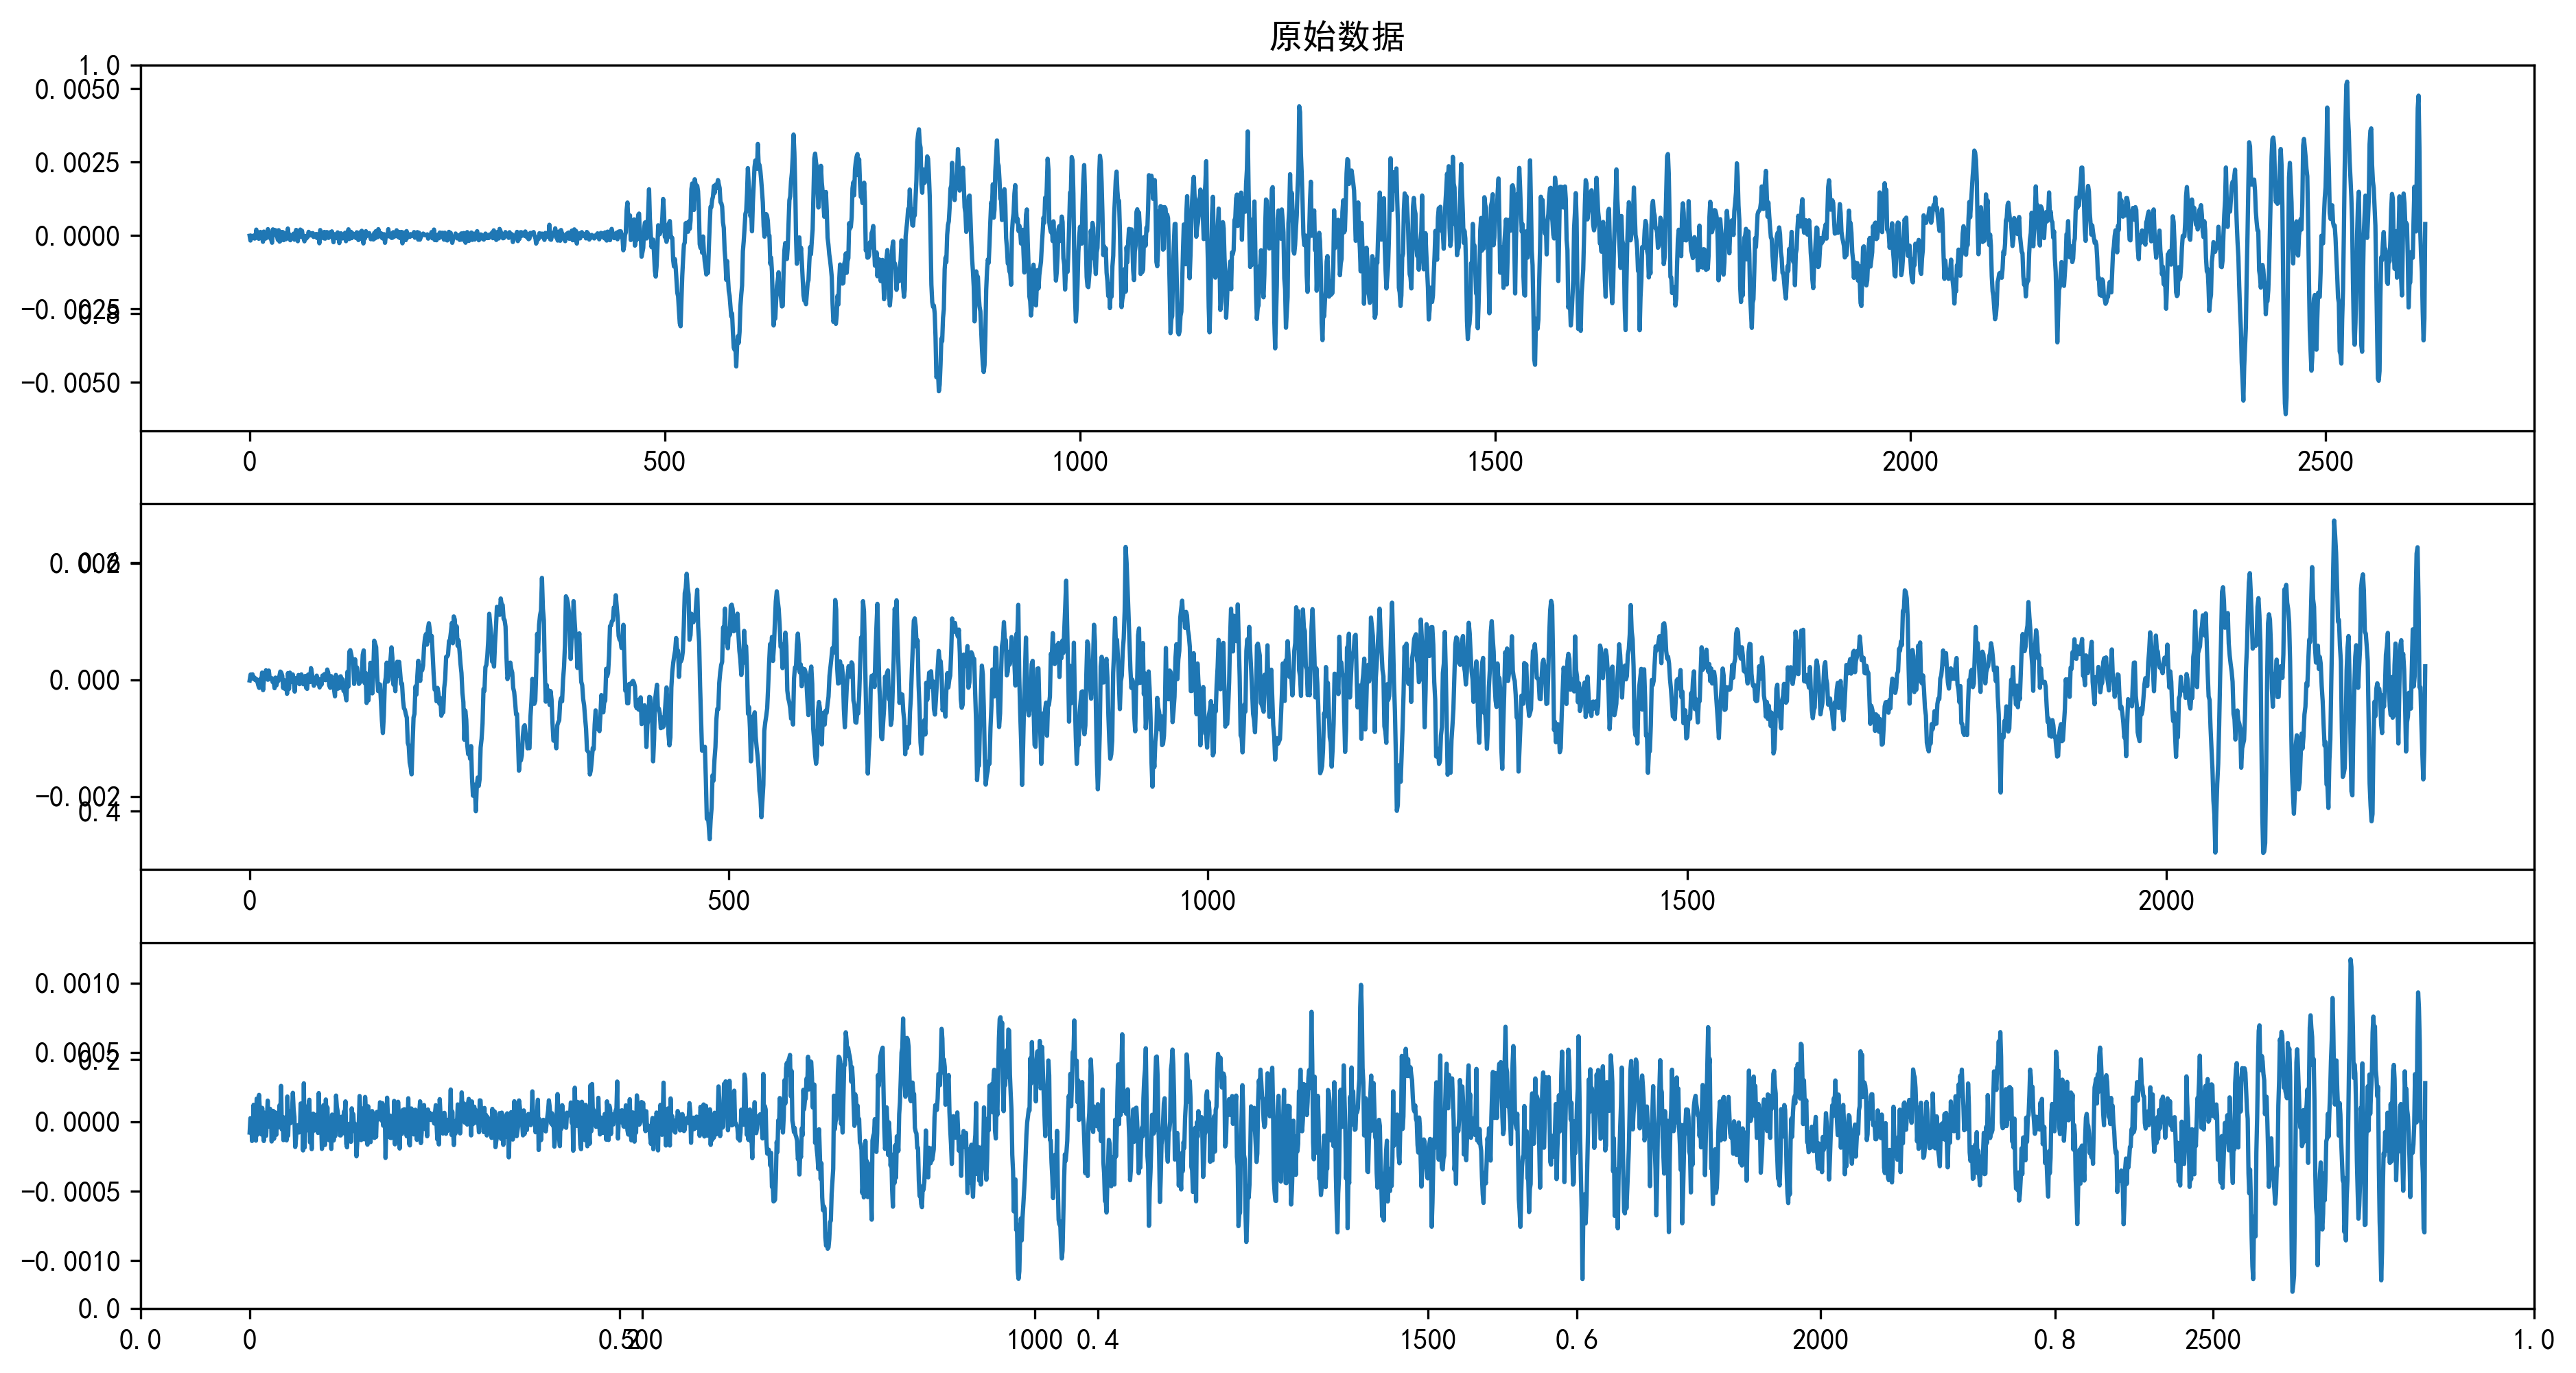

In [8]:

if __name__ == '__main__':
    delay_times = (350, 0, 500)

    # 读入
    data = sio.loadmat('relatedsig.mat')
    s1 = data['s1']
    s2 = data['s2']
    s3 = data['s3']
    fig = plt.figure(figsize=(15,8),dpi=300)
    plt.title("原始数据")
    ax1 = fig.add_subplot(311)
    ax1.plot(s1)
    ax2 = fig.add_subplot(312)
    ax2.plot(s2)
    ax3 = fig.add_subplot(313)
    ax3.plot(s3)
    plt.show()
    

信号 s1 落后于 s2，但领先于 s3
s2 领先于 s1 350 个样本，s3 落后于 s1 150 个样本，而 s2 领先于 s3 500 个样本。
通过保持最早的信号不动并截除其他向量中的延迟来对齐信号

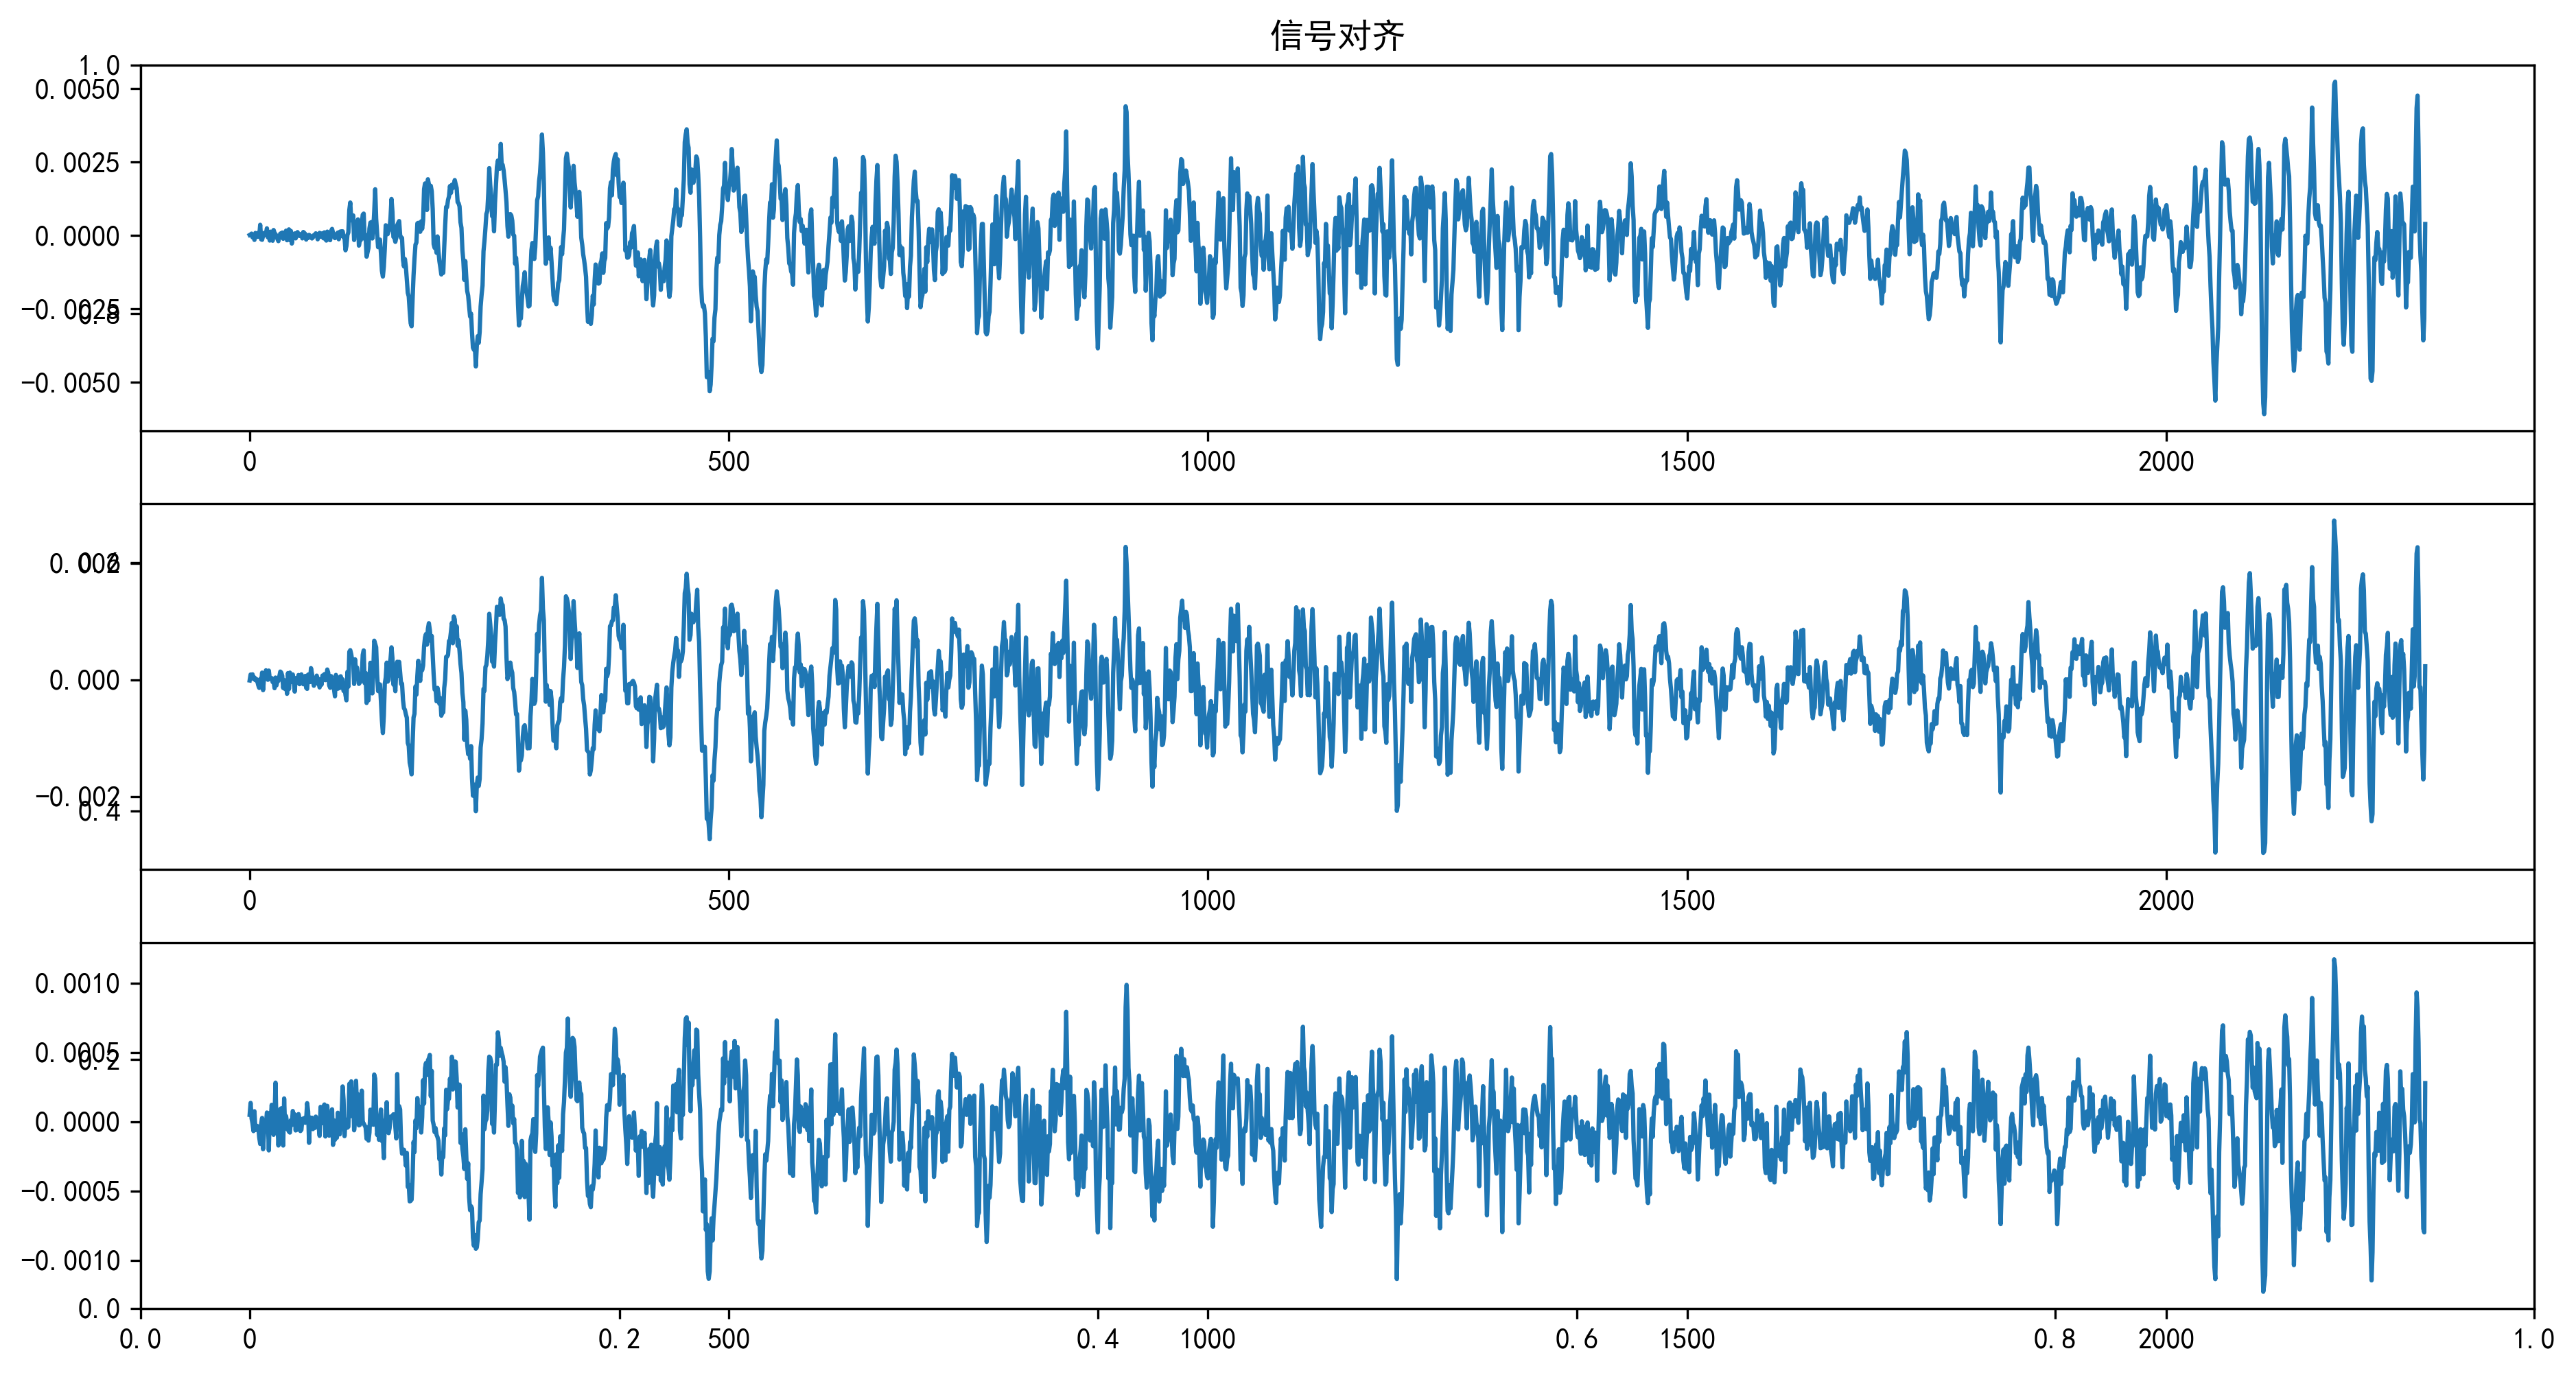

In [9]:
    s1_align, s2_align, s3_align = alignsignals(s1, s2, s3, delay_times)
    fig = plt.figure(figsize=(15,8),dpi=300)
    plt.title("信号对齐")
    ax1 = fig.add_subplot(311)
    ax1.plot(s1_align)
    ax2 = fig.add_subplot(312)
    ax2.plot(s2_align )
    ax3 = fig.add_subplot(313)
    ax3.plot(s3_align )
    plt.show()

这些信号现在已同步，可用于进一步处理。